In [2]:
!pip install pyecharts==0.1.9.4 -i "https://mirrors.aliyun.com/pypi/simple/"

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
#引入出具分析库

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

In [3]:
data = pd.read_csv(r'D:/学习/项目练习/淘宝用户行为分析/UserBehavior.csv',nrows=1999999) 
data.to_csv('D:/学习/项目练习/淘宝用户行为分析/UserBehavior_1.csv')

In [5]:
# 数据读取

file_path =r"D:/学习/项目练习/淘宝用户行为分析/UserBehavior_1.csv"
data=pd.read_csv(file_path,header=None,index_col=None)
data.columns=['User_Id','Item_Id','Category_Id','Behavior_type','Timestamp']
data.head(5)

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [16]:
# 一、数据读取和数据清洗
# 1.检查空值 ---检查结果数据无空值
print(pd.isnull(data["Timestamp"]).value_counts())
print(pd.isnull(data["Item_Id"]).value_counts())

False    1048576
Name: Timestamp, dtype: int64
False    1048576
Name: Item_Id, dtype: int64


In [49]:
# 2.检查异常值
# 1）Timestamp存在负值
print(data[data["Timestamp"]<0])
data = data[data["Timestamp"]>0]
# 2）Behavior_type存在异常值
print(data["Behavior_type"].value_counts())
data = data[data["Behavior_type"]!="3"]
# 3）检查异常处理结果
print(data[data["Timestamp"]<0])
print(data["Behavior_type"].value_counts())

print(data.info())  # [19999969 rows x 5 columns]
data.head()

Empty DataFrame
Columns: [User_Id, Item_Id, Category_Id, Behavior_type, Timestamp]
Index: []
pv      940047
cart     57861
fav      29353
buy      21315
Name: Behavior_type, dtype: int64
Empty DataFrame
Columns: [User_Id, Item_Id, Category_Id, Behavior_type, Timestamp]
Index: []
pv      940047
cart     57861
fav      29353
buy      21315
Name: Behavior_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   User_Id        1048576 non-null  int64 
 1   Item_Id        1048576 non-null  int64 
 2   Category_Id    1048576 non-null  int64 
 3   Behavior_type  1048576 non-null  object
 4   Timestamp      1048576 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 48.0+ MB
None


,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146


In [17]:
# 3.时间戳转换时间单位
data.loc[:,'Timestamp']=data['Timestamp'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
data.loc[:,'Date']=data['Timestamp'].apply(lambda x:x.split(' ')[0])
data.loc[:,'Time']=data['Timestamp'].apply(lambda x:x.split(' ')[1])
# 只取2017年11月25日至2017年12月3日之间的数据进行研究
# print(data["Date"].value_counts())
cleaned_data=data[(data["Date"]>='2017-11-25')&(data["Date"]<='2017-12-03')]
print(cleaned_data["Date"].value_counts())

2017-12-02    144414
2017-12-03    143650
2017-12-01    114352
2017-11-26    111973
2017-11-30    110774
2017-11-25    109334
2017-11-29    107065
2017-11-28    103869
2017-11-27    102634
Name: Date, dtype: int64


In [18]:
# 4.去除重复数据
print(cleaned_data.duplicated().value_counts())
cleaned_data=cleaned_data.drop_duplicates(subset=['User_Id','Item_Id','Category_Id','Behavior_type','Timestamp'],keep='first')
print(cleaned_data.duplicated().value_counts())

False    1048065
dtype: int64
False    1048065
dtype: int64


In [19]:
# 5.预处理数据保存
cleaned_data.to_csv(r'D:\学习\项目练习\淘宝用户行为分析\cleaned_data.csv', encoding = 'utf-8', index = False)
print(cleaned_data.duplicated().value_counts())

False    1048065
dtype: int64


In [20]:
####
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file_path =r"D:\学习\项目练习\淘宝用户行为分析\cleaned_data.csv"
data=pd.read_csv(file_path)
data.head()

,User_Id,Item_Id,Category_Id,Behavior_type,Timestamp,Date,Time
0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,01:21:10
1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,06:15:33
2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,09:21:25
3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15:04:53
4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15:49:06


In [21]:
describe1=pd.DataFrame({"用户数量":len(set(list(data["User_Id"]))),"产品数量":len(set(list(data["Item_Id"]))),"产品种类数量":len(set(list(data["Category_Id"]))),"统计天数":len(set(list(data["Date"])))},index=['1'])
describe1

,用户数量,产品数量,产品种类数量,统计天数
1,10202,412219,5856,9


In [22]:
describe3 = data.loc[:,["User_Id","Behavior_type"]]
ids = pd.DataFrame(np.zeros(len(set(list(data["User_Id"])))),index=list(set(data["User_Id"])))
pv_class=describe3[describe3["Behavior_type"]=="pv"].groupby("User_Id").count()
pv_class.columns  = ["pv"]
buy_class=describe3[describe3["Behavior_type"]=="buy"].groupby("User_Id").count()
buy_class.columns  = ["buy"]
fav_class=describe3[describe3["Behavior_type"]=="fav"].groupby("User_Id").count()
fav_class.columns  = ["fav"]
cart_class=describe3[describe3["Behavior_type"]=="cart"].groupby("User_Id").count()
cart_class.columns  = ["cart"]

user_behavior_counts=ids.join(pv_class).join(fav_class).join(cart_class).join(buy_class).iloc[:,1:]
user_behavior_counts.head()

,pv,fav,cart,buy
1,55.0,NaN,NaN,NaN
1015809,116.0,NaN,11.0,3.0
1015810,48.0,NaN,NaN,NaN
1015811,122.0,9.0,NaN,2.0
1015814,217.0,2.0,11.0,3.0


C:\Users\10557\AppData\Local\Temp\ipykernel_33276\1230864252.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


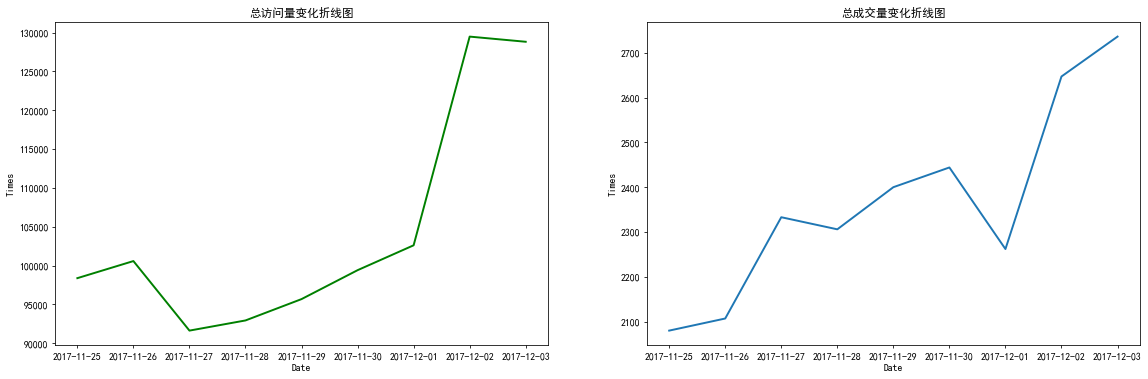

In [27]:
from matplotlib import font_manager
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
data["Behavior_type"].value_counts()
# pv      17901927
# cart     1107532
# fav       575114
# buy       404625

#访问量数据
data_pv = data[data["Behavior_type"]=="pv"][["Behavior_type","Date"]]
data_pv_date=data_pv.groupby(by="Date").count()
# print("访问量数据(单/天)","\n",data_pv_date)
#成交量数据
data_buy = data[data["Behavior_type"]=="buy"][["Behavior_type","Date"]]
data_buy_date=data_buy.groupby(by="Date").count()
# print("成交量数据(单/天)","\n",data_buy_date)
#绘图
# my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\Deng.ttf')
plt.figure(figsize=(20,6),dpi =70)
plt.title("总访问量、成交量变化折线图")
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt.sca(ax1)
plt.plot(data_pv_date.index,data_pv_date.values,label="pv",color="green",linewidth=2)
plt.title("总访问量变化折线图")
plt.xlabel("Date")
plt.ylabel("Times")

plt.sca(ax2)
plt.title("总成交量变化折线图")

plt.plot(data_buy_date.index,data_buy_date.values,label="buy",linewidth=2)
plt.xlabel("Date")
plt.ylabel("Times")
plt.show()

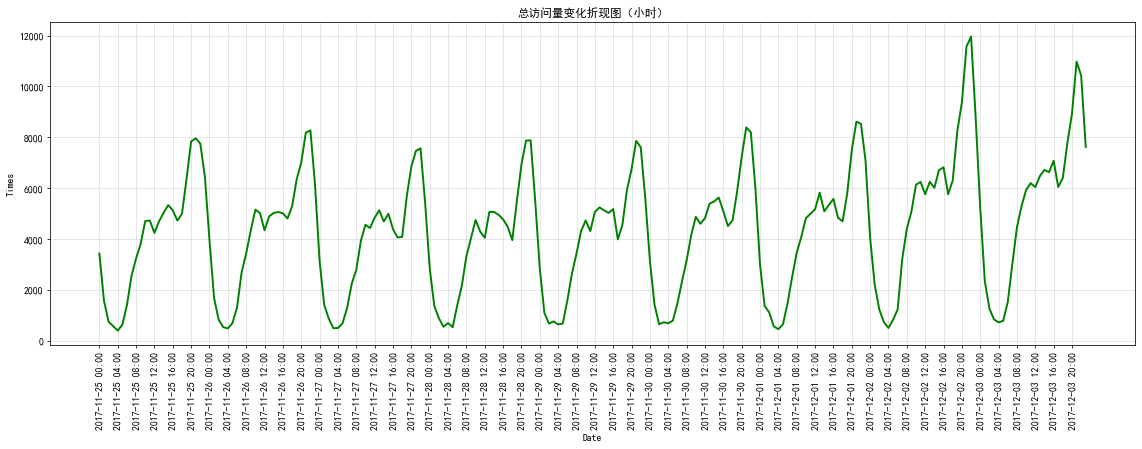

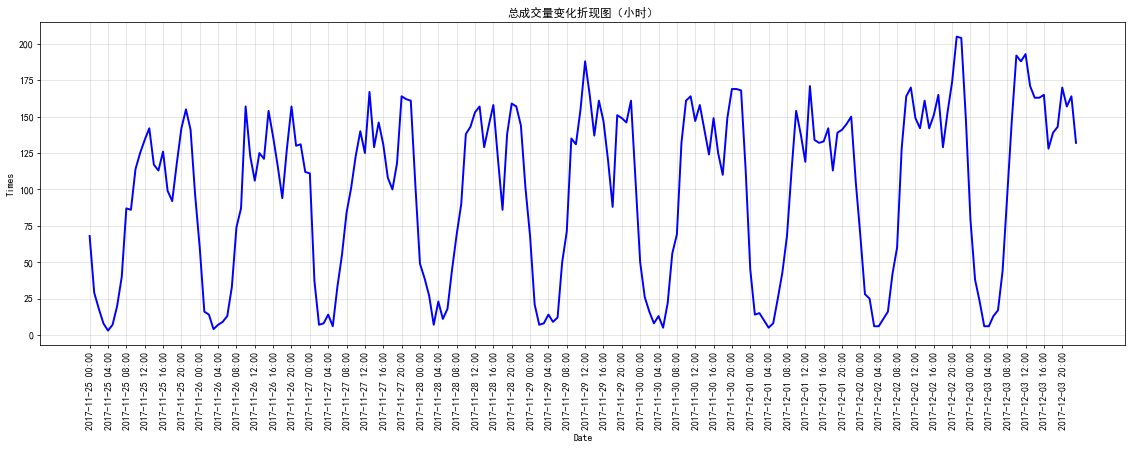

In [28]:
# 数据准备
data_pv_timestamp=data[data["Behavior_type"]=="pv"][["Behavior_type","Timestamp"]]
data_pv_timestamp["Timestamp"] = pd.to_datetime(data_pv_timestamp["Timestamp"])

data_pv_timestamp=data_pv_timestamp.set_index("Timestamp")
data_pv_timestamp=data_pv_timestamp.resample("H").count()["Behavior_type"]
data_pv_timestamp

data_buy_timestamp=data[data["Behavior_type"]=="buy"][["Behavior_type","Timestamp"]]
data_buy_timestamp["Timestamp"] = pd.to_datetime(data_buy_timestamp["Timestamp"])

data_buy_timestamp=data_buy_timestamp.set_index("Timestamp")
data_buy_timestamp=data_buy_timestamp.resample("H").count()["Behavior_type"]
data_buy_timestamp

#绘图1
plt.figure(figsize=(20,6),dpi =70)
_x1= data_pv_timestamp.index
plt.plot(range(len(_x1)),data_pv_timestamp.values,label="浏览量",color="green",linewidth=2)
plt.title("总访问量变化折现图（小时）")

_x1 = [i.strftime("%Y-%m-%d %H:%M") for i in _x1]

plt.xticks(range(len(_x1))[::4],_x1[::4],rotation=90)

plt.xlabel("Date")
plt.ylabel("Times")
plt.grid(alpha=0.4)

#绘图2
plt.figure(figsize=(20,6),dpi =70)
_x2= data_buy_timestamp.index
plt.plot(range(len(_x2)),data_buy_timestamp.values,label="成交量",color="blue",linewidth=2)
plt.title("总成交量变化折现图（小时）")

_x2 = [i.strftime("%Y-%m-%d %H:%M") for i in _x2]

plt.xticks(range(len(_x2))[::4],_x2[::4],rotation=90)

plt.xlabel("Date")
plt.ylabel("Times")
plt.grid(alpha=0.4)


 # 二、漏斗模型（echart)

In [34]:
#数据准备
behavior_data =data["Behavior_type"].value_counts()
# pv      17901927
# fav       575114
# cart     1107532
# buy       404625
dict_num = {'behavior':behavior_data.index,'numbers':behavior_data.values}
behavior_data = pd.DataFrame(dict_num)
behavior_data.loc[1,"behavior"]="cart+fav"
behavior_data.loc[1,"numbers"]+=behavior_data.loc[2,"numbers"]

behavior_data=behavior_data.loc[[0,1,3],:]
behavior_data

,behavior,numbers
0,pv,939536
1,cart+fav,87214
3,buy,21315


In [35]:
#计算单一环节转化率/总体转化率
import numpy as np
temp1 = np.array(behavior_data['numbers'][1:])
temp2 = np.array(behavior_data['numbers'][0:-1])
single_convs = temp1 / temp2
single_convs = list(single_convs)
single_convs.insert(0,1)
single_convs = [round(x,4) for x in single_convs]  # 利用round函数将转化率保留四位小数
behavior_data['单一环节转化率'] = single_convs
 
temp3 = np.array(behavior_data['numbers'])
temp4= np.ones(len(behavior_data['numbers'])) * behavior_data['numbers'][0]
total_convs = (temp3 / temp4).tolist()
total_convs = [round(x,4) for x in total_convs]
behavior_data['总体转化率'] = total_convs

behavior_data

,behavior,numbers,单一环节转化率,总体转化率
0,pv,939536,1.0000,1.0000
1,cart+fav,87214,0.0928,0.0928
3,buy,21315,0.2444,0.0227


In [42]:
from pyecharts import Funnel


attrs = behavior_data['behavior'].tolist()
attr_value = (np.array(behavior_data['总体转化率'])* 100).tolist()



funnel2 = Funnel("总体转化漏斗图",width=800, height=400, title_pos='center')
 
funnel2.add(name="商品交易环节",        # 指定图例名称
            attr=attrs,                 # 指定属性名称
            value = attr_value,         # 指定属性所对应的值
            is_label_show=True,         # 指定标签是否显示
            label_formatter='{b}{c}%',  # 指定标签显示的格式
            label_pos="outside",        # 指定标签的位置
            is_legend_show=False)       # 指定图例不显示图例
 
funnel2.render("1.html")

In [43]:
from IPython.display import Image as IMG

display(IMG("D:/学习/项目练习/淘宝用户行为分析/总体转化漏斗图.png"))

FileNotFoundError: No such file or directory: 'D:/学习/项目练习/淘宝用户行为分析/总体转化漏斗图.png'

FileNotFoundError: No such file or directory: 'D:/学习/项目练习/淘宝用户行为分析/总体转化漏斗图.png'

<IPython.core.display.Image object>